# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Perpetua Westri Maheswara
- **Email:** westrimaheswara@gmail.com
- **ID Dicoding:** perpetuawm

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda (daily & monthly) untuk periode tahun 2011 s.d 2012?
2. Bagaimana pola peminjaman sepeda dalam sehari untuk periode tahun 2011 s.d 2012?
3. Bagaimana hubungan antara musim dan cuaca dengan jumlah sewa sepeda pada periode tahun 2011 s.d 2012?
4. Bagaimana hubungan antara hari libur dengan jumlah sewa sepeda pada periode tahun 2011 s.d 2012?


## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini hal yang dilakukan adalah
1. import dataset yang akan digunakan menjadi dataframe
2. mengecek informasi dari data (jumah baris dan kolom, tipe data)
3. menampilkan dataframe untuk screening awal

In [10]:
# import data
day_df = pd.read_csv("Data/day.csv")
hour_df = pd.read_csv("Data/hour.csv")

In [11]:
# Menampilkan info day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
# Menampilkan day_df
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [13]:
# Menampilkan info hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
# Menampilkan hour_df
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Kolom dteday masih berupa object dan bukan datetime
- instant merupakan record index namun berupa integer
- beberapa kolom kategorikal seperti "season","holiday", "weekday", "workingday","weathersit

### Assessing Data

Pada tahap ini hal yang dilakukan adalah:
1. mengecek apakah terdapat data yang duplikat
2. mengecek apakah ada data yang hilang/kosong (missing value)
3. mengecek outlier

#### 1. Mengecek Data Duplikat

In [19]:
# mengecek jumlah data duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


#### 2. Mengecek Missing Value

In [21]:
# mengecek jumlah missing value pada day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
# mengecek jumlah missing value pada hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- tidak terdapat duplikasi data pada dataset
- tidak terdapat missing value pada dataset

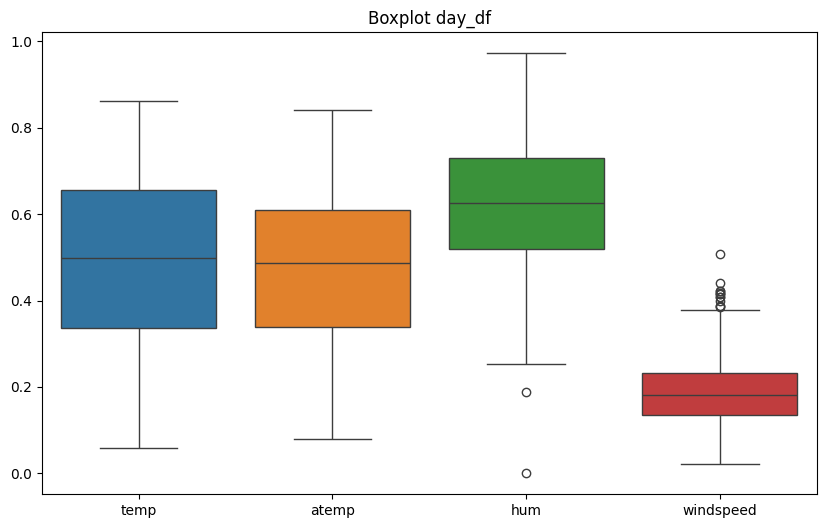

In [24]:
# menemukan outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df[["temp", "atemp", "hum", "windspeed"]], whis=1.5)
plt.title('Boxplot day_df')
plt.show()

In [25]:
# menemukan outliers dengan metode IQR
outliers = pd.DataFrame()
num_columns = ["temp", "atemp", "hum", "windspeed"]
for column in num_columns:
    Q1 = day_df[column].quantile(0.25)
    Q3 = day_df[column].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outliers_in_column = day_df[(day_df[column] < batas_bawah) | (day_df[column] > batas_atas)]
    outliers = pd.concat([outliers, outliers_in_column])

outliers

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732


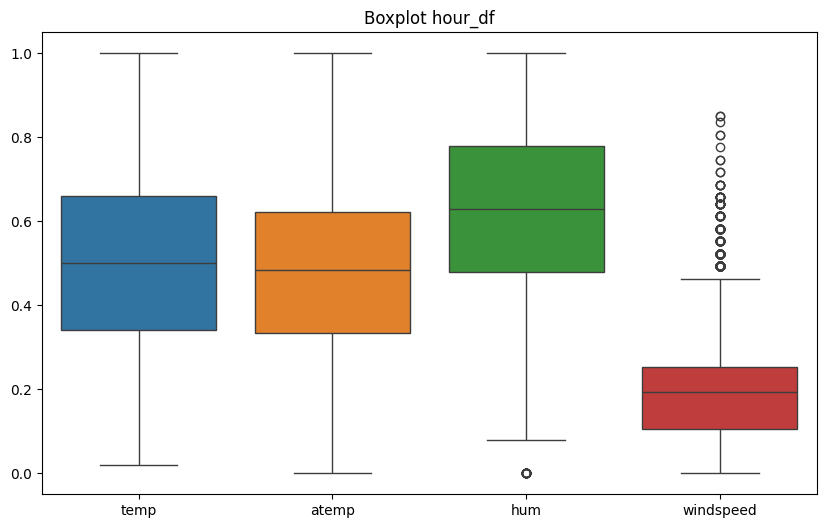

In [26]:
# menemukan outlier pada hour_df
plt.figure(figsize=(10, 6))
sns.boxplot(data=hour_df[["temp", "atemp", "hum", "windspeed"]], whis=1.5)
plt.title('Boxplot hour_df')
plt.show()

In [27]:
# menemukan outliers dengan metode IQR
outliers_hour_df = pd.DataFrame()
num_columns = ["temp", "atemp", "hum", "windspeed"]
for column in num_columns:
    Q1 = day_df[column].quantile(0.25)
    Q3 = day_df[column].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outliers_in_column = hour_df[( hour_df[column] < batas_bawah) | (hour_df[column] > batas_atas)]
    outliers_hour_df = pd.concat([outliers_hour_df, outliers_in_column])

outliers_hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1005,1006,2011-02-14,1,0,2,13,0,1,1,1,0.58,0.5455,0.19,0.3881,27,93,120
1006,1007,2011-02-14,1,0,2,14,0,1,1,1,0.60,0.5909,0.15,0.4925,14,76,90
1029,1030,2011-02-15,1,0,2,14,0,2,1,1,0.34,0.3182,0.19,0.2239,10,69,79
1030,1031,2011-02-15,1,0,2,15,0,2,1,1,0.34,0.3333,0.19,0.1642,11,74,85
1031,1032,2011-02-15,1,0,2,16,0,2,1,1,0.34,0.3182,0.19,0.2537,21,77,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17342,17343,2012-12-30,1,1,12,11,0,0,0,1,0.26,0.2273,0.41,0.4179,33,103,136
17343,17344,2012-12-30,1,1,12,12,0,0,0,1,0.28,0.2273,0.36,0.5821,47,97,144
17344,17345,2012-12-30,1,1,12,13,0,0,0,1,0.30,0.2576,0.36,0.6567,49,120,169
17345,17346,2012-12-30,1,1,12,14,0,0,0,1,0.30,0.2727,0.36,0.4627,39,121,160


In [28]:
persen_outlier_day_df = len(outliers)/len(day_df)
persen_outlier_day_df

0.02051983584131327

In [29]:
persen_outlier_hour_df = len(outliers_hour_df)/len(hour_df)
persen_outlier_hour_df

0.0826284596351919

### Insight
1. Berdasarkan hasil pengecekan, terdapat beberapa outlier untuk kolom humidity dan windspeed
2. outliers tersebut disebabkan karena cuaca ekstrem seperti: https://en.wikipedia.org/wiki/Hurricane_Sandy; https://en.wikipedia.org/wiki/March_2012_North_American_heat_wave
3. Terdapat 15 baris outliers pada day_df dan 1436 baris pada hour_df
4. Karena jumlah outlier kurang dari 10 persen data maka baris untuk outlier akan dihilangkan

### Cleaning Data

Pada tahap ini dilakukan pembersihan data. Hal-hal yang dilakukan antara lain:
1. menyesuaikan jenis kolom pada dataset yang awalnya dteday object disesuaikan menjadi datetime
2. menyesuaikan jenis kolom pada dataset yang merupakan kategorikal/indexes menjadi str/object

tidak terdapat missing value maupun duplicate value pada tahap sebelumnya sehingga tidak dilakukan treatment missing dan duplicate value

#### Cleaning day_df

In [34]:
# menyesuaikan kolom datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])


In [35]:
# mengubah type column menjadi object
category_columns = ["instant","season", "holiday", "weekday", "workingday","weathersit"]

for column in category_columns:
  day_df[column] = day_df[column].astype("object")

In [36]:
# Drop outlier dari dataset
index_outlier_day_df = outliers.index
day_df = day_df.drop(index=index_outlier_day_df)

In [37]:
# menampilkan df yang sudah berubah
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
# menampilkan info df yang sudah berubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     717 non-null    object        
 1   dteday      717 non-null    datetime64[ns]
 2   season      717 non-null    object        
 3   yr          717 non-null    int64         
 4   mnth        717 non-null    int64         
 5   holiday     717 non-null    object        
 6   weekday     717 non-null    object        
 7   workingday  717 non-null    object        
 8   weathersit  717 non-null    object        
 9   temp        717 non-null    float64       
 10  atemp       717 non-null    float64       
 11  hum         717 non-null    float64       
 12  windspeed   717 non-null    float64       
 13  casual      717 non-null    int64         
 14  registered  717 non-null    int64         
 15  cnt         717 non-null    int64         
dtypes: datetime64[ns](1), float64(4

#### Cleaning hour_df

In [40]:
# mengubah type column menjadi object
for column in category_columns:
  hour_df[column] = hour_df[column].astype("object")

In [41]:
# menyesuaikan kolom datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [42]:
# Drop outlier dari dataset
index_outlier_hour_df = outliers_hour_df.index
hour_df = hour_df.drop(index=index_outlier_hour_df)

In [43]:
# menampilkan info df yang sudah berubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15972 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     15972 non-null  object        
 1   dteday      15972 non-null  datetime64[ns]
 2   season      15972 non-null  object        
 3   yr          15972 non-null  int64         
 4   mnth        15972 non-null  int64         
 5   hr          15972 non-null  int64         
 6   holiday     15972 non-null  object        
 7   weekday     15972 non-null  object        
 8   workingday  15972 non-null  object        
 9   weathersit  15972 non-null  object        
 10  temp        15972 non-null  float64       
 11  atemp       15972 non-null  float64       
 12  hum         15972 non-null  float64       
 13  windspeed   15972 non-null  float64       
 14  casual      15972 non-null  int64         
 15  registered  15972 non-null  int64         
 16  cnt         15972 non-null 

In [44]:
# menampilkan df yang sudah berubah
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [45]:
# deskripsi data object/string
day_df.describe(include = "object")

,instant,season,holiday,weekday,workingday,weathersit
count,717,717,717,717,717,717
unique,717,4,2,7,2,3
top,731,3,0,0,1,1
freq,1,188,696,103,491,453


In [46]:
# deskripsi data object/string
hour_df.describe(include = "object")

,instant,season,holiday,weekday,workingday,weathersit
count,15972,15972,15972,15972,15972,15972
unique,15972,4,2,7,2,4
top,17379,3,0,0,1,1
freq,1,4313,15519,2319,10915,10445


### Insight
- terdapat perbedaan antara 2 dataframe dimana pada data day_df terdapat 3 kategori untuk *weathersit* sementara hour_df terdapat 4 kategori pada *weathersit*.
- hal ini bisa dimungkinkan karena cuaca perjam berbeda dengan cuaca harian
- analisis dan visualisasi lebih lanjut akan menggunkan day_df

## Exploratory Data Analysis (EDA)

Pada tahap ini hal-hal yang dilakukan antara lain:
1. mendeskripsikan data
2. mengelompokkan data berdasrkan season, yr, mnth, holiday, weekday, workingday, weathersit, temp, hum, windspeed

### Explore day_df

In [51]:
# mendeskripsikan data day_df
day_df.describe()

,dteday,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,717,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,2012-01-01 18:42:40.669455872,0.499303,6.562064,0.497365,0.476252,0.631562,0.186287,856.944212,3675.899582,4532.843794
min,2011-01-01 00:00:00,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,2011-07-04 00:00:00,0.000000,4.000000,0.337500,0.337939,0.524583,0.134329,318.000000,2545.000000,3214.000000
50%,2011-12-31 00:00:00,0.000000,7.000000,0.505833,0.491783,0.630833,0.178496,727.000000,3681.000000,4570.000000
75%,2012-07-03 00:00:00,1.000000,10.000000,0.656667,0.611121,0.732917,0.230721,1120.000000,4807.000000,6031.000000
max,2012-12-31 00:00:00,1.000000,12.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000
std,NaN,0.500349,3.439113,0.183617,0.163155,0.139222,0.071786,689.273998,1557.676255,1933.542429


In [52]:
# mengelompokkan data berdasarkan tahun
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum",
    "temp":  ["min", "max", "mean"],
    "hum":  ["min", "max", "mean"],
    "windspeed":  ["min", "max", "mean"]
})

instant  casual registered      cnt     temp                           hum  \
   nunique     sum        sum      sum      min       max      mean       min   
yr                                                                              
0      359  245094     984733  1229827  0.05913  0.849167  0.487371  0.302174   
1      358  369335    1650887  2020222  0.10750  0.861667  0.507387  0.254167   

                     windspeed                      
       max      mean       min       max      mean  
yr                                                  
0   0.9725  0.648104  0.022392  0.375617  0.187963  
1   0.9250  0.614974  0.046650  0.378108  0.184605

In [53]:
# mengelompokkan data berdasarkan bulan
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum",
    "temp":  ["min", "max", "mean"],
    "hum":  ["min", "max", "mean"],
    "windspeed":  ["min", "max", "mean"]
})

instant casual registered     cnt      temp                      \
     nunique    sum        sum     sum       min       max      mean   
mnth                                                                   
1         61  11933     119624  131557  0.059130  0.425000  0.235347   
2         53  13833     129710  143543  0.134783  0.521667  0.298555   
3         58  42670     170118  212788  0.198333  0.601667  0.386899   
4         58  59901     204283  264184  0.300000  0.664167  0.469180   
5         62  75285     256401  331686  0.414167  0.775000  0.594798   
6         60  73906     272436  346342  0.540833  0.834167  0.684097   
7         62  78157     266791  344948  0.595833  0.861667  0.755470   
8         62  72039     279155  351194  0.635833  0.793333  0.708582   
9         60  70323     275668  345991  0.469167  0.753333  0.616485   
10        60  58291     255407  313698  0.254167  0.657500  0.485290   
11        60  36603     218228  254831  0.245833  0.530000  0.369220   
12        61  21488     187799  209287  0.215833  0.475833  0.324985   

           hum                     windspeed                      
           min       max      mean       min       max      mean  
mnth                                                              
1     0.311250  0.911250  0.588164  0.073396  0.378108  0.202874  
2     0.314348  0.929167  0.583421  0.045408  0.361950  0.198826  
3     0.290000  0.948261  0.604016  0.089558  0.368167  0.212109  
4     0.254167  0.888333  0.589922  0.065929  0.358196  0.229229  
5     0.360417  0.922500  0.688958  0.074637  0.342667  0.182989  
6     0.305000  0.833333  0.575806  0.077125  0.347642  0.185420  
7     0.396250  0.865417  0.597876  0.080850  0.284813  0.166059  
8     0.415000  0.850000  0.637730  0.070283  0.375617  0.172918  
9     0.467083  0.972500  0.714714  0.050379  0.357587  0.165945  
10    0.463333  0.906250  0.694706  0.022392  0.358200  0.167374  
11    0.333478  0.962500  0.624876  0.046650  0.376871  0.183801  
12    0.483333  0.970417  0.669726  0.047275  0.374383  0.172826

In [54]:
# mengelompokkan data per bulan per tahun
agg_mo = day_df.groupby(['yr', 'mnth'])[['registered', 'casual', "cnt"]].sum().reset_index()
agg_mo

,yr,mnth,registered,casual,cnt
0,0,1,35116,3073,38189
1,0,2,39165,5502,44667
2,0,3,50642,12780,63422
3,0,4,68515,21445,89960
4,0,5,104771,31050,135821
5,0,6,112900,30612,143512
6,0,7,104889,36452,141341
7,0,8,107849,28842,136691
8,0,9,100873,26545,127418
9,0,10,94565,24751,119316


In [55]:
# mengelompokkan data per musim
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum",
    "temp":  ["min", "max", "mean"],
    "hum":  ["min", "max", "mean"],
    "windspeed":  ["min", "max", "mean"]
})
     

instant  casual registered      cnt      temp                      \
       nunique     sum        sum      sum       min       max      mean   
season                                                                     
1          172   58199     389641   447840  0.059130  0.572500  0.295135   
2          181  201826     706295   908121  0.253043  0.808333  0.545509   
3          188  226091     835038  1061129  0.469167  0.861667  0.706309   
4          176  128313     704646   832959  0.220833  0.657500  0.422295   

             hum                     windspeed                      
             min       max      mean       min       max      mean  
season                                                              
1       0.311250  0.948261  0.594315  0.045408  0.378108  0.204267  
2       0.254167  0.922500  0.628797  0.065929  0.358196  0.200469  
3       0.360000  0.939565  0.633482  0.064071  0.375617  0.172095  
4       0.333478  0.972500  0.668757  0.022392  0.376871  0.169288

In [56]:
#mengelompokkan data per musim per tahun
agg_se = day_df.groupby(['yr', 'season'])[['registered', 'casual', "cnt"]].sum().reset_index()
agg_se

,yr,season,registered,casual,cnt
0,0,1,125190,20639,145829
1,0,2,265743,76663,342406
2,0,3,324200,95450,419650
3,0,4,269600,52342,321942
4,1,1,264451,37560,302011
5,1,2,440552,125163,565715
6,1,3,510838,130641,641479
7,1,4,435046,75971,511017


In [57]:
#mengelompokkan data berdasarkan hari libur
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum",
    "temp":  ["min", "max", "mean"],
    "hum":  ["min", "max", "mean"],
    "windspeed":  ["min", "max", "mean"]
})

instant  casual registered      cnt      temp                      \
        nunique     sum        sum      sum       min       max      mean   
holiday                                                                     
0           696  592070    2579544  3171614  0.059130  0.861667  0.498341   
1            21   22359      56076    78435  0.175833  0.789167  0.465012   

              hum                     windspeed                      
              min       max      mean       min       max      mean  
holiday                                                              
0        0.254167  0.972500  0.632071  0.022392  0.378108  0.186074  
1        0.381304  0.790833  0.614704  0.042304  0.329665  0.193319

In [58]:
# mengelompokkan data berdasarkan hari
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum",
    "temp":  ["min", "max", "mean"],
    "hum":  ["min", "max", "mean"],
    "windspeed":  ["min", "max", "mean"]
})

instant  casual registered     cnt      temp                      \
        nunique     sum        sum     sum       min       max      mean   
weekday                                                                    
0           103  139450     298589  438039  0.096522  0.830000  0.487145   
1           102   69047     375870  444917  0.097391  0.781667  0.493902   
2           103   57676     409638  467314  0.150000  0.818333  0.505157   
3           103   57210     412462  469672  0.107500  0.793333  0.506580   
4           101   60457     414738  475195  0.144348  0.827500  0.505536   
5           103   77791     405430  483221  0.160870  0.848333  0.496412   
6           102  152798     318893  471691  0.059130  0.861667  0.486845   

              hum                     windspeed                      
              min       max      mean       min       max      mean  
weekday                                                              
0        0.275833  0.948261  0.628592  0.050379  0.361950  0.184354  
1        0.302174  0.925000  0.643780  0.042304  0.358200  0.184630  
2        0.290000  0.962500  0.641827  0.053213  0.365671  0.189920  
3        0.360000  0.970417  0.647330  0.060958  0.345779  0.185526  
4        0.305000  0.939565  0.615685  0.047275  0.350133  0.186149  
5        0.354167  0.972500  0.615762  0.022392  0.378108  0.184171  
6        0.254167  0.929167  0.627734  0.045404  0.376871  0.189267

In [59]:
# mengelompokkan data berdasarkan hari kerja
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum",
    "temp":  ["min", "max", "mean"],
    "hum":  ["min", "max", "mean"],
    "windspeed":  ["min", "max", "mean"]
})

instant  casual registered      cnt      temp                      \
           nunique     sum        sum      sum       min       max      mean   
workingday                                                                     
0              226  314607     673558   988165  0.059130  0.861667  0.484953   
1              491  299822    1962062  2261884  0.097391  0.848333  0.503078   

                 hum                     windspeed                      
                 min       max      mean       min       max      mean  
workingday                                                              
0           0.254167  0.948261  0.626914  0.042304  0.376871  0.187404  
1           0.290000  0.972500  0.633702  0.022392  0.378108  0.185772

In [60]:
# mengelompokkan data berdasarkan cuaca
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum",
    "temp":  ["min", "max", "mean"],
    "hum":  ["min", "max", "mean"],
    "windspeed":  ["min", "max", "mean"]
})

instant  casual registered      cnt     temp                      \
           nunique     sum        sum      sum      min       max      mean   
weathersit                                                                    
1              453  442416    1784352  2226768  0.05913  0.861667  0.514392   
2              244  168164     817871   986035  0.10750  0.815000  0.470811   
3               20    3849      33397    37246  0.21750  0.633913  0.435658   

                 hum                     windspeed                      
                 min       max      mean       min       max      mean  
weathersit                                                              
1           0.254167  0.835833  0.568330  0.022392  0.378108  0.185147  
2           0.414583  0.972500  0.727665  0.047275  0.375617  0.183801  
3           0.731250  0.970417  0.891316  0.097021  0.358200  0.242409

<Axes: >

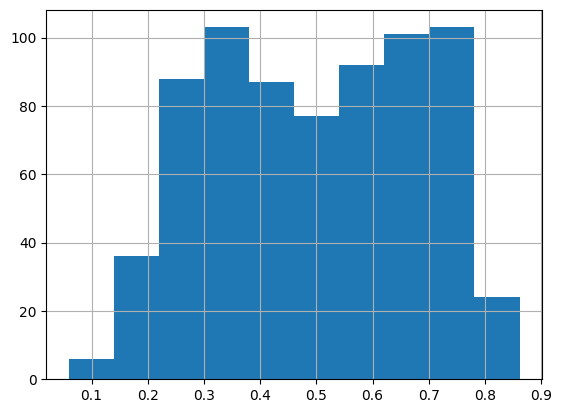

In [61]:
# distribusi frekuensi peminjaman berdasarkan temperatur
day_df.temp.hist()

<Axes: >

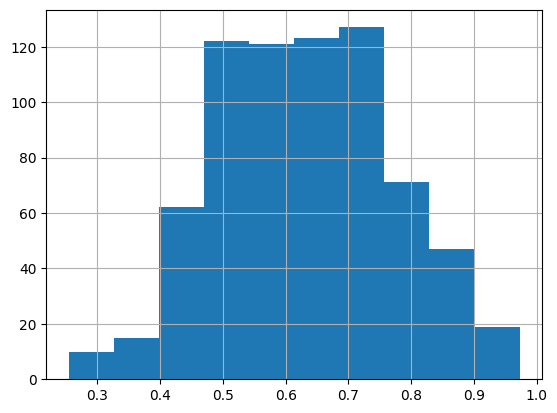

In [62]:
# distribusi frekuensi peminjaman berdasarkan humidity
day_df.hum.hist()

<Axes: >

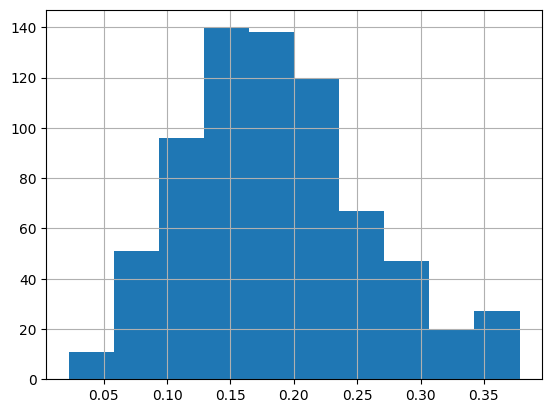

In [63]:
# distribusi frekuensi peminjaman berdasarkan windspeed
day_df.windspeed.hist()

<Axes: >

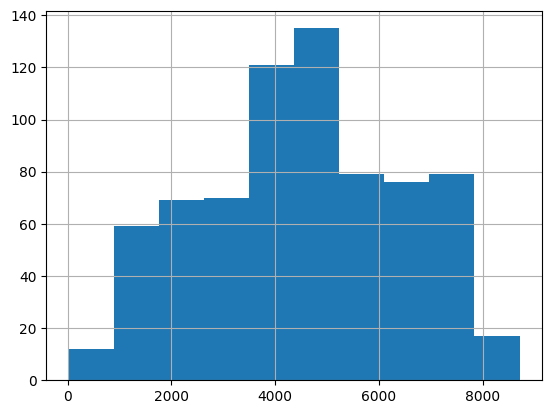

In [64]:
day_df.cnt.hist()

### Explore hour_df

In [66]:
hour_df.describe()

,dteday,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,15972,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2012-01-05 09:45:29.075882752,0.503694,6.630040,11.383546,0.500016,0.479593,0.639451,0.168044,35.309291,152.605560,187.914851
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.020000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-10 00:00:00,0.000000,4.000000,5.000000,0.340000,0.333300,0.490000,0.104500,4.000000,32.000000,38.000000
50%,2012-01-04 00:00:00,1.000000,7.000000,11.000000,0.520000,0.484800,0.650000,0.164200,16.000000,114.000000,140.000000
75%,2012-07-07 00:00:00,1.000000,10.000000,18.000000,0.660000,0.621200,0.790000,0.253700,48.000000,219.000000,280.000000
max,2012-12-31 00:00:00,1.000000,12.000000,23.000000,0.980000,1.000000,1.000000,0.358200,367.000000,886.000000,977.000000
std,NaN,0.500002,3.407709,6.993214,0.193202,0.171064,0.186723,0.097933,49.026037,151.452436,181.363011


In [67]:
# mengelompokkan data berdasarkan jam
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum",
    "temp":  ["min", "max", "mean"],
    "hum":  ["min", "max", "mean"],
    "windspeed":  ["min", "max", "mean"]
})

instant casual registered     cnt  temp                   hum       \
   nunique    sum        sum     sum   min   max      mean   min  max   
hr                                                                      
0      697   7241      30971   38212  0.04  0.82  0.472080  0.24  1.0   
1      694   4630      19035   23665  0.04  0.82  0.463516  0.24  1.0   
2      688   3317      12681   15998  0.02  0.82  0.457064  0.24  1.0   
3      674   1862       6134    7996  0.02  0.80  0.455816  0.26  1.0   
4      667    847       3459    4306  0.02  0.78  0.450375  0.24  1.0   
5      697    998      12977   13975  0.02  0.78  0.437073  0.24  1.0   
6      698   2949      50811   53760  0.02  0.80  0.435215  0.26  1.0   
7      702   7829     142069  149898  0.02  0.80  0.441738  0.26  1.0   
8      689  15073     233539  248612  0.02  0.84  0.455704  0.30  1.0   
9      665  20965     125758  146723  0.04  0.86  0.481143  0.26  1.0   
10     662  31165      84889  116054  0.04  0.92  0.503958  0.24  1.0   
11     647  39853      98075  137928  0.06  0.94  0.532025  0.23  1.0   
12     637  45032     120378  165410  0.06  0.96  0.551994  0.22  1.0   
13     643  47803     118347  166150  0.08  0.96  0.563670  0.21  1.0   
14     630  48383     105664  154047  0.10  0.96  0.575175  0.21  1.0   
15     607  46288     109385  155673  0.12  0.96  0.576870  0.21  1.0   
16     620  47150     150616  197766  0.12  0.96  0.567677  0.21  1.0   
17     622  47156     240770  287926  0.12  0.98  0.558810  0.21  1.0   
18     649  40639     238647  279286  0.08  0.96  0.545855  0.21  1.0   
19     660  33345     176504  209849  0.08  0.92  0.530485  0.22  1.0   
20     676  25185     130054  155239  0.06  0.92  0.512722  0.21  1.0   
21     676  19836      99516  119352  0.06  0.88  0.501331  0.21  1.0   
22     679  15576      75827   91403  0.06  0.84  0.490692  0.21  1.0   
23     693  10838      51310   62148  0.04  0.84  0.481934  0.23  1.0   

             windspeed                    
        mean       min     max      mean  
hr                                        
0   0.700029       0.0  0.3582  0.150586  
1   0.711686       0.0  0.3582  0.146333  
2   0.723212       0.0  0.3582  0.142967  
3   0.734703       0.0  0.3582  0.140445  
4   0.748006       0.0  0.3582  0.142480  
5   0.749354       0.0  0.3582  0.142557  
6   0.750616       0.0  0.3582  0.147058  
7   0.735470       0.0  0.3582  0.155061  
8   0.708462       0.0  0.3582  0.161453  
9   0.671850       0.0  0.3582  0.167976  
10  0.624713       0.0  0.3582  0.178454  
11  0.579243       0.0  0.3582  0.179132  
12  0.546656       0.0  0.3582  0.181710  
13  0.520327       0.0  0.3582  0.190807  
14  0.508619       0.0  0.3582  0.199695  
15  0.505865       0.0  0.3582  0.195309  
16  0.511968       0.0  0.3582  0.203757  
17  0.526077       0.0  0.3582  0.197607  
18  0.544145       0.0  0.3582  0.197275  
19  0.579121       0.0  0.3582  0.186977  
20  0.607175       0.0  0.3582  0.175443  
21  0.638728       0.0  0.3582  0.160472  
22  0.661753       0.0  0.3582  0.156007  
23  0.681356       0.0  0.3582  0.151673

**Insight:**
- **duplikasi**: semua record merupakan record unique, tidak terdapat duplikasi
- **jumlah peminjam**: berdasarkan jenisnya, registered users lebih banyak daripada casual users
- **year**: jumlah peminjaman di tahun 2012 lebih banyak dari tahun sebelumnya
- **month**: dalam dua tahun jumlah peminjaman terjadi paling banyak di bulan agustus; pola bulanan pada tahun 2011 dan 2012 terlihat berbeda.(analisis lebih lanjut akan divisualkan)
- **season**: Sepeda paling banyak dipinjam saat musim gugur (3) disusul saat musim panas (2) dan paling sedikit dipinjam saat musim semi (1)
- **holiday dan workingday** : sepeda lebih banyak dipinjam pada saat hari kerja (bukan libur)
- **cuaca** : sepeda paling banyak dipinjam saat cuaca cerah "Clear, Few clouds, Partly cloudy, Partly cloudy"
- **weekday** : peminjaman terjadi paling banyak di hari jumat
- **temp** : frekuensi peminjaman banyak saat temp 0,2-0,8 (normalized). Terindikasi sebelumnya sepeda banyak dipinjam saat musim panas dan musim gugur.
- **hum** : frekuensi peminjaman banyak saat kelembapan sedang dikisaran 0,5 - 0,8 (normalized humidity)
- **windspeed** : frekuensi peminjaman banyak saat windspeed ada pada kisaran 0,1 - 0,3 (normalized)
- **hour** : peminjaman sepeda paling banyak terjadi di jam 17.00


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda (daily & monthly) untuk periode tahun 2011 s.d 2012?

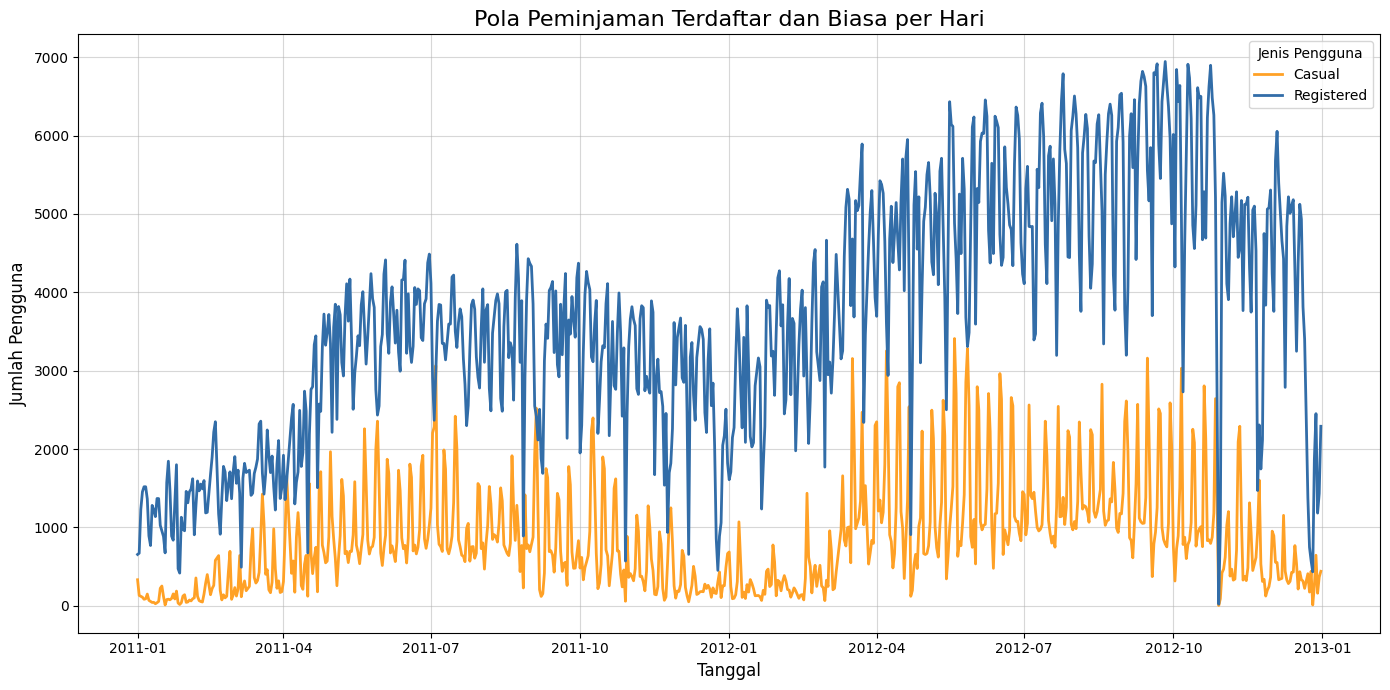

In [71]:
# grouping untuk mendapatkan jumlah harian
daily_data = day_df.groupby("dteday")[["casual", "registered"]].sum().reset_index()

# Membuat Plot
plt.figure(figsize=(14, 7))
plt.plot(daily_data["dteday"], daily_data["casual"], label="Casual", color="#FFA126", linewidth=2)
plt.plot(daily_data["dteday"], daily_data["registered"], label="Registered", color="#326DA8", linewidth=2)

# Menambahkan label, legend, dan Judul
plt.title("Pola Peminjaman Terdaftar dan Biasa per Hari", fontsize=16)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.legend(title="Jenis Pengguna", fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

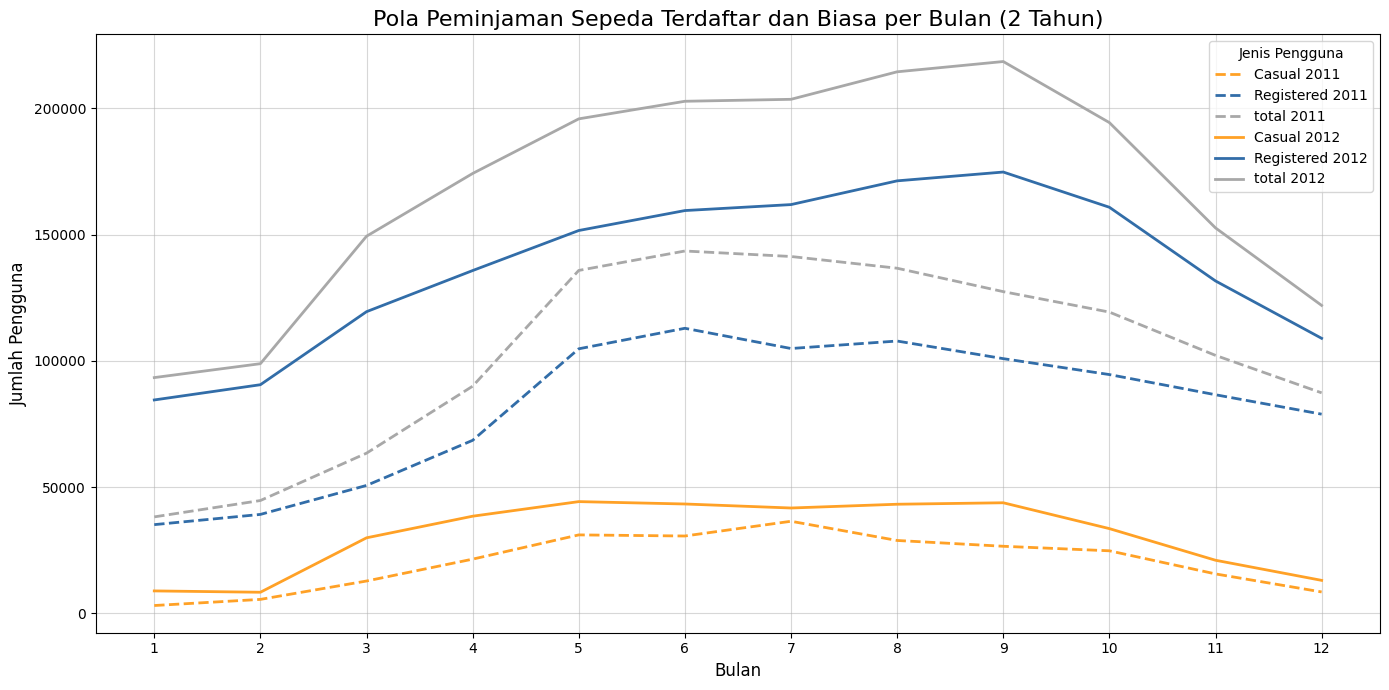

In [72]:
# grouping data per bulan per tahun
mnth_data = day_df.groupby(["yr", "mnth"])[["casual", "registered", "cnt"]].sum().reset_index()
mnth_data["yr"] = mnth_data["yr"].map({0: 2011, 1: 2012})

# Membuat Plot
plt.figure(figsize=(14, 7))
years = [2011, 2012] 
colors = ["#FFA126", "#326DA8","#A8A8A8"] 
for i, year in enumerate(years):
    data = mnth_data[mnth_data["yr"] == year]
    plt.plot(data["mnth"], data["casual"], label=f"Casual {year}", color=colors[0], linewidth=2, linestyle='--' if i == 0 else '-')
    plt.plot(data["mnth"], data["registered"], label=f"Registered {year}", color=colors[1], linewidth=2, linestyle='--' if i == 0 else '-')
    plt.plot(data["mnth"], data["cnt"], label=f"total {year}", color=colors[2], linewidth=2, linestyle='--' if i == 0 else '-')

# Add labels, title, legend, and grid
plt.title("Pola Peminjaman Sepeda Terdaftar dan Biasa per Bulan (2 Tahun)", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.legend(title="Jenis Pengguna", fontsize=10)
plt.xticks(range(1, 13), fontsize=10)  
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

### Insight
- Peminjaman sepeda di tahun 2012 secara konsisten lebih tinggi dibandingkan jumlah peminjaman sepeda di tahun 2011.
- Setiap harinya, jumlah peminjam registered lebih banyak dibandingkan jumlah pelanggan casual.
- Dalam 2 tahun, terdapat perbedaan pola peminjaman sepeda. Pada Tahun 2011, penyewaan sepeda meningkat hingga mencapai titik tertinggi di bulan 5 dan 6 lalu turun hingga akhir tahun. Sementara itu, di tahun 2012, jumlah sewa sepeda meningkat hingga titik tertinggi di bulan 9 lalu turun hingga akhir tahun.

### Pertanyaan 2: Bagaimana pola peminjaman sepeda dalam sehari untuk periode tahun 2011 s.d 2012?

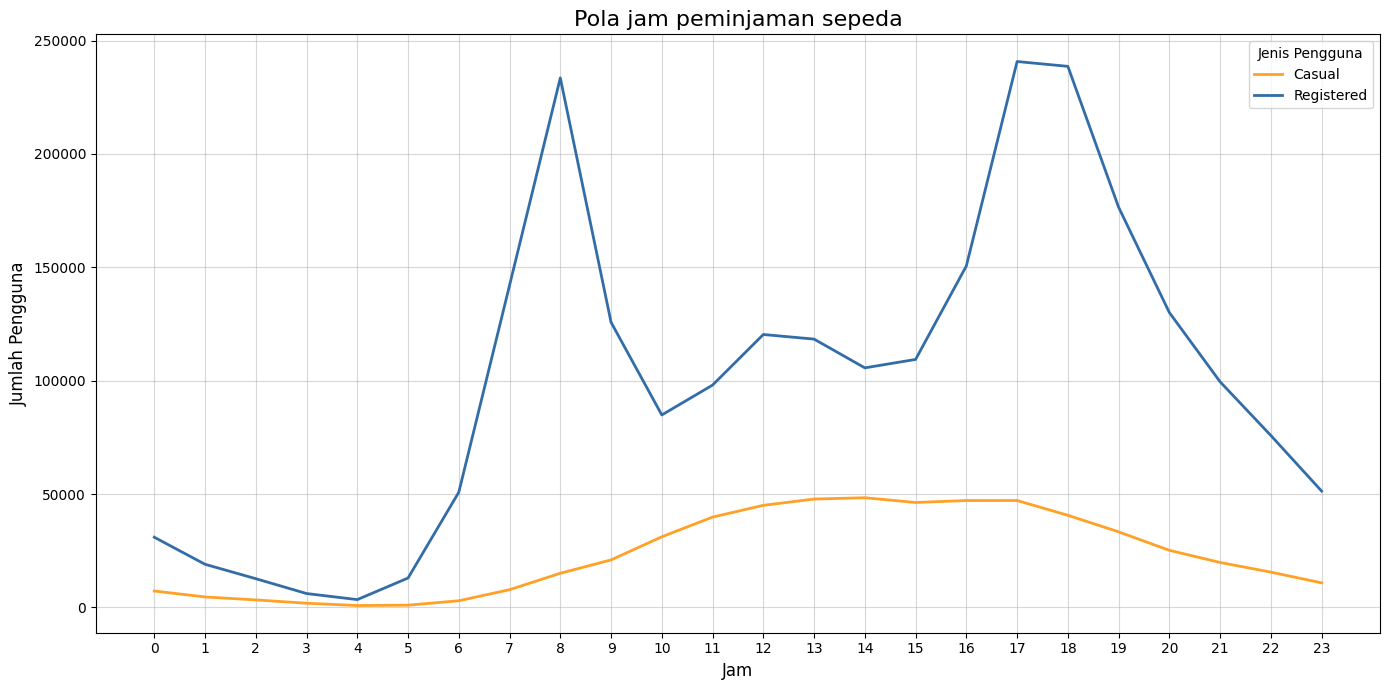

In [75]:
# Grouping data untuk mendapatkan jumlah perjam
hour_data = hour_df.groupby("hr")[["casual", "registered"]].sum().reset_index()

# Membuat plot 
plt.figure(figsize=(14, 7))
plt.plot(hour_data["hr"], hour_data["casual"], label="Casual", color="#FFA126", linewidth=2)
plt.plot(hour_data["hr"], hour_data["registered"], label="Registered", color="#326DA8", linewidth=2)

# Menambahkan label, legend, dan Judul
plt.title("Pola jam peminjaman sepeda", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.legend(title="Jenis Pengguna", fontsize=10)
plt.xticks(range(0, 24), fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

### Insight
- Berdasarkan pola peminjaman per jam, peminjaman oleh pengguna registered paling tinggi di jam 5-6 sore dan jam 8 pagi. Jam-jam ini merupakan jam masuk dan pulang kantor di hari kerja.
- Sementara itu, pengguna biasa banyak menyewa di jam 12 - 5 sore.

### Pertanyaan 3: Bagaimana hubungan antara musim dan cuaca dengan jumlah sewa sepeda pada periode tahun 2011 s.d 2012?

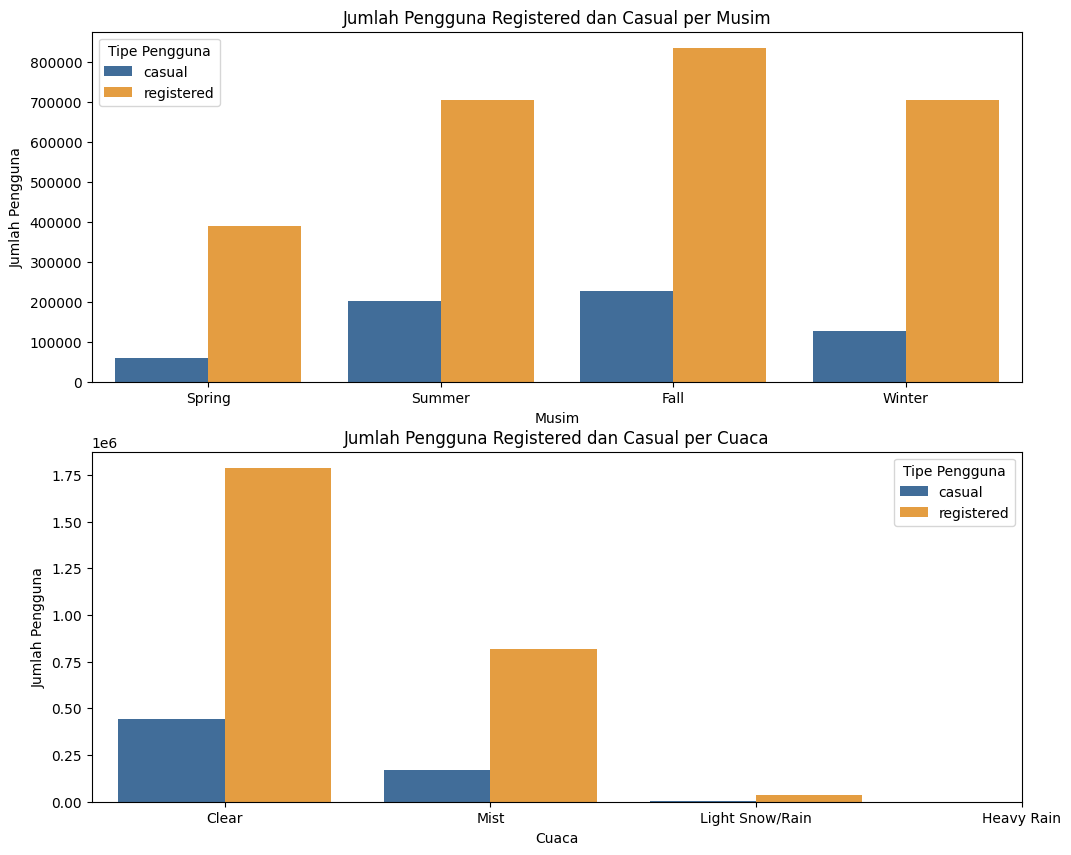

In [78]:
# Group data dan menghitung jumlah registered dan casual
season_data = day_df.groupby("season")[["registered", "casual"]].sum().reset_index()
weathersit_data = day_df.groupby("weathersit")[["registered", "casual"]].sum().reset_index()
# Buat subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
# Mendefinisikan labels untuk xticks
season_labels = ["Spring", "Summer", "Fall", "Winter"]
weathersit_labels = ["Clear","Mist", "Light Snow/Rain", "Heavy Rain"]
# Mendefinisikan warna
registered_color = "#326DA8"
casual_color = "#FFA126"

# Plot registered dan casual per Musim
sns.barplot(ax=axes[0], data=season_data.melt(id_vars="season", value_vars=["casual", "registered"]),
            x="season", y="value", hue="variable", palette=[registered_color, casual_color])
axes[0].set_title("Jumlah Pengguna Registered dan Casual per Musim")
axes[0].set_xlabel("Musim")
axes[0].set_ylabel("Jumlah Pengguna")
axes[0].set_xticks(range(len(season_labels)))  
axes[0].set_xticklabels(season_labels)         
axes[0].legend(title="Tipe Pengguna")

# Plot registered dan casual users per cuaca
sns.barplot(ax=axes[1], data=weathersit_data.melt(id_vars="weathersit", value_vars=["casual", "registered"]),
            x="weathersit", y="value", hue="variable", palette=[registered_color, casual_color])
axes[1].set_title("Jumlah Pengguna Registered dan Casual per Cuaca")
axes[1].set_xlabel("Cuaca")
axes[1].set_ylabel("Jumlah Pengguna")
axes[1].set_xticks(range(len(weathersit_labels)))  
axes[1].set_xticklabels(weathersit_labels)         
axes[1].legend(title="Tipe Pengguna")

### Insight
- pengguna terdaftar dan biasa banyak menyewa sepeda di musim gugur (fall) disusul oleh musim panas (summer), kemudian musim dingin (winter) dan terakhir musim semi (spring).
- Terdapat perbedaan yang cukup signifikan antara jumlah peminjaman sepeda saat cuaca cerah dan tidak. Sepeda banyak dipinjam saat cuaca cerah. Saat hujan ringan, hanya sedikit peminjam yang menyewa sepeda. Tidak ada yang meminjam sepeda saat hujan deras

### Pertanyaan 4: Bagaimana hubungan antara hari libur dengan jumlah sewa sepeda pada periode tahun 2011 s.d 2012?

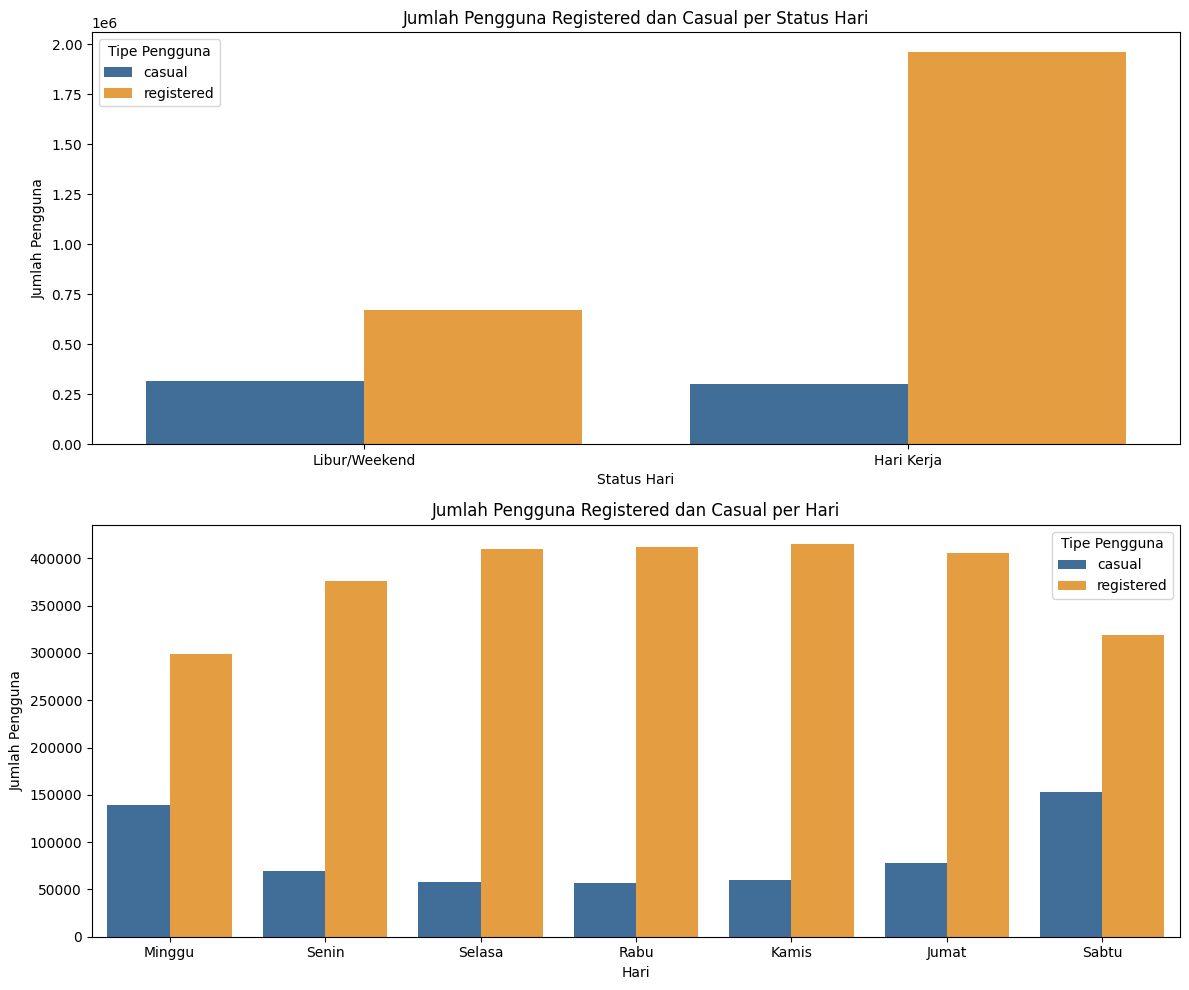

In [81]:
# Group data dan menghitung jumlah registered dan casual
workingday_data = day_df.groupby("workingday")[["registered", "casual"]].sum().reset_index()
weekday_data = day_df.groupby("weekday")[["registered", "casual"]].sum().reset_index()

# Buat subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Mendefinisikan labels untuk xticks
workingday_labels = ["Libur/Weekend", "Hari Kerja"]
weekday_labels = ["Minggu","Senin", "Selasa", "Rabu", "Kamis", "Jumat","Sabtu"]

# Plot registered dan casual users per status hari
sns.barplot(ax=axes[0], data=workingday_data.melt(id_vars="workingday", value_vars=["casual", "registered"]),
            x="workingday", y="value", hue="variable", palette=[registered_color, casual_color])
axes[0].set_title("Jumlah Pengguna Registered dan Casual per Status Hari")
axes[0].set_xlabel("Status Hari")
axes[0].set_ylabel("Jumlah Pengguna")
axes[0].set_xticks(range(len(workingday_labels)))  
axes[0].set_xticklabels(workingday_labels)         
axes[0].legend(title="Tipe Pengguna")

# Plot registered dan casuall users per hari
sns.barplot(ax=axes[1], data=weekday_data.melt(id_vars="weekday", value_vars=["casual", "registered"]),
            x="weekday", y="value", hue="variable", palette=[registered_color, casual_color])
axes[1].set_title("Jumlah Pengguna Registered dan Casual per Hari")
axes[1].set_xlabel("Hari")
axes[1].set_ylabel("Jumlah Pengguna")
axes[1].set_xticks(range(len(weekday_labels)))  
axes[1].set_xticklabels(weekday_labels)         
axes[1].legend(title="Tipe Pengguna")

plt.tight_layout()
plt.show()

## Insight
- Baik pada hari libur/weekend dan hari kerja, sepeda paling banyak dipinjam oleh registered user.
- Dari pola hariannya, jumlah peminjaman biasa meningkat di hari minggu dan sabtu. Sementara itu pola peminjam registered pada hari Minggu/Sabtu lebih rendah dibandingkan weekdays.
- Hal ini relevan dengan jam peminjaman pada grafik sebelumnya dimana peminjam registered user banyak meminjam di jam kerja sementara casual user banyak meminjam disiang hari/diluar jam kerja

## Analisis Lanjutan (Opsional)

Pada analisis sebelumnya ditemukan bahwa ada kemungkinan korelasi antara temp, hum, dan windspeed dengan jumlah peminjaman sepeda
- **temp** : frekuensi peminjaman banyak saat temp 0,2-0,8 (normalized). Terindikasi sebelumnya sepeda banyak dipinjam saat musim panas dan musim gugur.
- **hum** : frekuensi peminjaman banyak saat kelembapan sedang dikisaran 0,5 - 0,8 (normalized humidity)
- **windspeed** : frekuensi peminjaman banyak saat windspeed ada pada kisaran 0,1 - 0,3 (normalized)

Oleh karena itu pada tahap ini ada dianalisis apakah terdapat korelasi pada kondisi-kondisi tersebut terhadap jumlah peminjaman sepeda

### Analisis Korelasi

In [86]:
# Membuat matrix korelasi
corr_mat = day_df[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()
round(corr_mat,2)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.00,0.99,0.11,-0.14,0.54,0.54,0.63
atemp,0.99,1.00,0.13,-0.17,0.54,0.54,0.63
hum,0.11,0.13,1.00,-0.20,-0.10,-0.12,-0.14
windspeed,-0.14,-0.17,-0.20,1.00,-0.15,-0.20,-0.22
casual,0.54,0.54,-0.10,-0.15,1.00,0.39,0.67
registered,0.54,0.54,-0.12,-0.20,0.39,1.00,0.94
cnt,0.63,0.63,-0.14,-0.22,0.67,0.94,1.00


<Axes: >

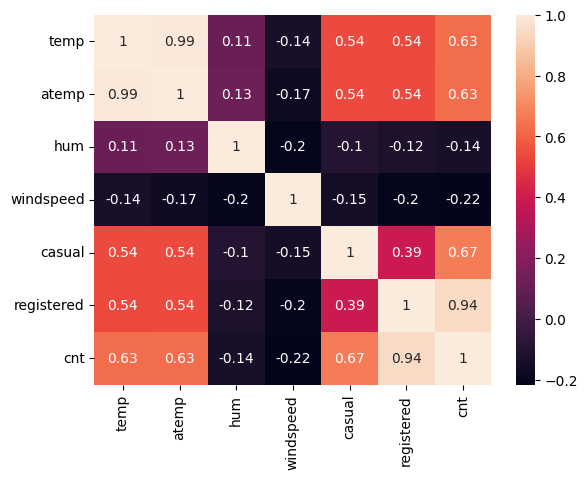

In [87]:
# membuat heatmap dari matrix korelasi
sns.heatmap(corr_mat, annot=True)

## Insight
### Korelasi: Bagaimana korelasi temp, atemp, hum, dan windspeed terhadap jumlah sewa sepeda pada periode 2011 s.d 2012?
- Berdasarkan hasil matriks korelasi, kondisi temp, atemp berkorelasi kuat dan positif terhadap jumlah penyewa sepeda baik itu penyewa biasa maupun penyewa registered
- Meskipun tanalisis ini tidak dapat diartikan bahwa temperature berpengaruh terhadap jumlah sewa sepeda, namun korelasi positif menunjukan bahwa semakin hangat temperature maka semakin banyak jumlah sewa sepeda. Hasil dari korelasi ini relevan dengan jumlah sewa sepeda yang banyak di musim panas dan musim gugur dibandingkan musim dingin dan musim semi.
- Sementara itu, humidity dan windspeed berkorelasi lemah dan negatif terhadap jumlah penyewa sepeda baik itu penyewa biasa maupun penyewa registered
- Selanjutnya akan dilakukan visualisasi untuk menampilkan korelasi antara temp dengan jumlah peminjaman

In [89]:
# membuat df untuk menggambarkan korelasi temperature dengan jumlah penyewa dengan scatterplot
temp_df = day_df[["temp","cnt"]].copy()
# tambhakan kolom label
temp_bins = [0, 0.3, 0.6, 1.00]
cnt_bins = [0, 3000, 6000, 10000]
temp_labels = ["Low", "Medium", "High"] 
cnt_labels = ["Sedikit", "Sedang", "Banyak"]
temp_df["kondisi_suhu"] = pd.cut(temp_df["temp"], bins=temp_bins, labels=temp_labels, right=False)
temp_df["jumlah_peminjam"] = pd.cut(temp_df["cnt"], bins=cnt_bins, labels=cnt_labels, right=False)

# tampilkan
temp_df.head(100)

,temp,cnt,kondisi_suhu,jumlah_peminjam
0,0.344167,985,Medium,Sedikit
1,0.363478,801,Medium,Sedikit
2,0.196364,1349,Low,Sedikit
3,0.200000,1562,Low,Sedikit
4,0.226957,1600,Low,Sedikit
...,...,...,...,...
100,0.595652,3348,Medium,Sedang
101,0.502500,2034,Medium,Sedikit
102,0.412500,2162,Medium,Sedikit
103,0.467500,3267,Medium,Sedang


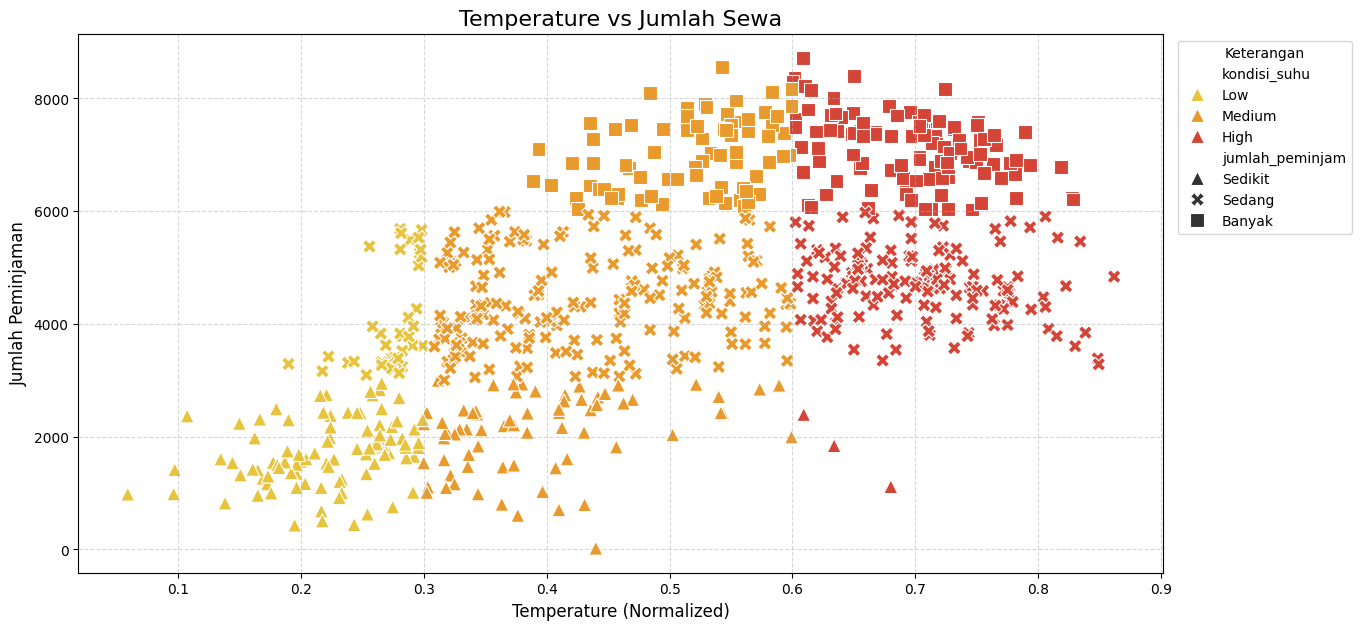

In [90]:
# Membuat plot
plt.figure(figsize=(14, 7))
sns.scatterplot(x="temp", y="cnt", hue="kondisi_suhu", style="jumlah_peminjam", markers={"Sedikit": "^", "Sedang": "X", "Banyak": "s"}, data=temp_df, palette=["#E8C33C", "#E99A2C","#D44437"],s=100)

# menambahkan judul, label, dan legend
plt.title("Temperature vs Jumlah Sewa", fontsize=16)
plt.xlabel("Temperature (Normalized)", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.legend(title="Keterangan", bbox_to_anchor=(1.18, 1), loc="upper right")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Conclusion

### Pertanyaan 1: Bagaimana pola peminjaman sepeda (daily & monthly) untuk periode tahun 2011 s.d 2012?
- Peminjaman sepeda di tahun 2012 secara konsisten lebih tinggi dibandingkan jumlah peminjaman sepeda di tahun 2011.
- Setiap harinya, jumlah peminjam registered lebih banyak dibandingkan jumlah pelanggan casual.
- Dalam 2 tahun, terdapat perbedaan pola peminjaman sepeda. Pada Tahun 2011, penyewaan sepeda meningkat hingga mencapai titik tertinggi di bulan 5 dan 6 lalu turun hingga akhir tahun. Sementara itu, di tahun 2012, jumlah sewa sepeda meningkat hingga titik tertinggi di bulan 9 lalu turun hingga akhir tahun.
  
### Pertanyaan 2: Bagaimana pola peminjaman sepeda dalam sehari untuk periode tahun 2011 s.d 2012?
- Dalam dua tahun terakhir, berdasarkan pola peminjaman per jam, peminjaman oleh pengguna registered paling tinggi di jam 5-6 sore dan jam 8 pagi. Jam-jam ini merupakan jam masuk dan pulang kantor di hari kerja.
- Sementara itu, pengguna biasa banyak menyewa di jam 12 - 5 sore.
  
### Pertanyaan 3: Bagaimana hubungan antara musim dan cuaca dengan jumlah sewa sepeda pada periode tahun 2011 s.d 2012?
- Dalam dua tahun terakhir, pengguna terdaftar dan biasa banyak menyewa sepeda di musim gugur (fall) disusul oleh musim panas (summer), kemudian musim dingin (winter) dan terakhir musim semi (spring).
- Terdapat perbedaan yang cukup signifikan antara jumlah peminjaman sepeda saat cuaca cerah dan tidak. Sepeda banyak dipinjam saat cuaca cerah. Saat hujan ringan, hanya sedikit peminjam yang menyewa sepeda. Tidak ada yang meminjam sepeda saat hujan deras

### Pertanyaan 4: Bagaimana hubungan antara hari libur dengan jumlah sewa sepeda pada periode tahun 2011 s.d 2012?
- Baik pada hari libur/weekend dan hari kerja, sepeda paling banyak dipinjam oleh registered user.
- Dari pola hariannya, jumlah peminjaman biasa meningkat di hari minggu dan sabtu. Sementara itu pola peminjam registered pada hari Minggu/Sabtu lebih rendah dibandingkan weekdays.
- Hal ini relevan dengan jam peminjaman pada grafik sebelumnya dimana peminjam registered user banyak meminjam di jam kerja sementara casual user banyak meminjam disiang hari/diluar jam kerja

### Korelasi: Bagaimana korelasi temp, atemp, hum, dan windspeed terhadap jumlah sewa sepeda pada periode 2011 s.d 2012?
- Berdasarkan hasil matriks korelasi, kondisi temp, atemp berkorelasi kuat dan positif terhadap jumlah penyewa sepeda baik itu penyewa biasa maupun penyewa registered
- Meskipun tanalisis ini tidak dapat diartikan bahwa temperature berpengaruh terhadap jumlah sewa sepeda, namun korelasi positif menunjukan bahwa semakin hangat temperature maka semakin banyak jumlah sewa sepeda. Hasil dari korelasi ini relevan dengan jumlah sewa sepeda yang banyak di musim panas dan musim gugur dibandingkan musim dingin dan musim semi.
- Sementara itu, humidity dan windspeed berkorelasi lemah dan negatif terhadap jumlah penyewa sepeda baik itu penyewa biasa maupun penyewa registered
- Selanjutnya akan dilakukan visualisasi untuk menampilkan korelasi antara temp dengan jumlah peminjaman
### Saran
- Perusahaan dapat menambahkan stock sepeda pada saat waktu sibuk seperti di musim panas dan musim gugur.
- Proses maintance penuh sepeda dapat dilakukan saat musim dingin dan musim semi agar tidak mengganggu stock di musim panas dan musim gugur
- Perusahaan dapat memberikan insentif bagi pengguna biasa untuk menjadi pengguna terdaftar (membership) agar menggunakan sepedanya secara regular di hari kerja juga

In [93]:
# mengunduh day_df menjadi csv
#day_df.to_csv("day_df.csv", index=False)

In [94]:
# mengunduh day_df menjadi csv
#hour_df.to_csv("hour_df.csv", index=False)